# PRG.REC_Bases

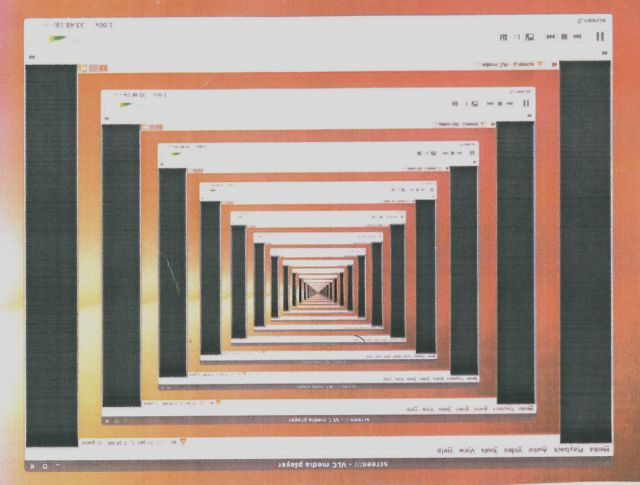

## 1. Première approche
### 1.1. Définition
> Une méthode est dite récursive lorsqu'elle fait appel à elle-même dans sa propre définition. 

### 1.2 Un très mauvais exemple
C'est déjà une première chose à comprendre : un programme **peut** être appelé par lui-même, à l'intérieur de sa propre définition.

In [ ]:
def prems():
    print("un très mauvais exemple")
    prems()

In [ ]:
prems()

```un très mauvais exemple
un très mauvais exemple
un très mauvais exemple
un très mauvais exemple
un très mauvais exemple
un très mauvais exemple
un très mauvais exemple
un très mauvais exemple
un très mauvais exemple
un très mauvais exemple
un très mauvais exemple
un très mauvais exemple
un très mauvais exemple
un très mauvais exemple
...```

Évidemment, comme prévu, ce programme ne s'arrête pas. Nous sommes obligés de l'arrêter manuellement. Nous sommes (volontairement) tombés dans un piège qui sera systématiquement présent lors d'une programmation récursive : [le piège de la boucle infinie](data/meme2.gif).  


Mais attention : la récursivité ne DOIT PAS être associée à une auto-référence vertigineuse : c'est en algorithmique une méthode (parfois) très efficace, à condition de respecter une règle cruciale : **l'existence d'un CAS DE BASE**.  

Ce «cas de base» sera aussi appelé «condition d'arrêt», puisque la très grande majorité des algorithmes récursifs peuvent être perçus comme des escaliers qu'on dévale à toute vitesse, en déséquilibre jusqu'au sol qui assure notre arrêt.


(extrait du site https://realpython.com/)


Lorsque nous allons programmer une fonction récursive, nous allons donc commencer par la fin, c'est-à-dire par le moment où elle renvoie effectivement un résultat. C'est le cas de base.

Imaginez que vous devez cacher une clé dans une maison : 
- vous commencez par la cacher sous le lavabo de la salle de bain. 
- puis vous laissez un mot sur la table de la cuisine : «allez voir sur la première marche de l'escalier».
- puis vous laissez un mot sur la première marche de l'escalier : «allez voir sur le canapé du salon».
- etc, jusqu'à l'indice final «allez voir sous le lavabo de la salle de bain».

La personne qui va subir cette chasse au trésor va rentrer dans un processus où chaque indice va en appeler un autre, mais elle sait très bien que ces indices emboîtés vont s'arrêter un jour.

Lorsque vous allez programmer un algorithme récursif, vous allez donc commencer par coder le cas de base, la situation finale.

Pour arriver progressivement vers la situation finale , chaque appel récursif se fera en décrémentant un paramètre : cela assurera l'arrêt du programme.

Observons ceci dans l'exemple suivant :

### 1.3 Enfin un bon exemple

In [ ]:
def mystere(n):
    if n == 0 :
        return 0
    else : 
        return n + mystere(n-1)

Observer :
- le cas de base (si ```n``` vaut 0 on renvoie *vraiment* une valeur, en l'occurence 0)
- l'appel récursif
- la décrémentation du paramètre d'appel

In [ ]:
mystere(0)

In [ ]:
mystere(4)

Que se passe-t-il lorsqu'on appelle ```mystere(4)``` ?

\begin{align}
  \rm{mystere(4)} &= 4+ \rm{mystere(3)}\\
   &= 4+ (3+\rm{mystere(2)}) \\
   &= 4+ (3+(2+\rm{mystere(1)} )) \\
   &= 4+ (3+(2+(1+\rm{mystere(0)} ))) \\   
   &= 4+ (3+(2+(1+0 ))) \\  
\end{align}


On voit que l'existence du cas de base pour $n=0$ est primordiale pour éviter la récursion infinie.

![](data/diag.png)


Cette fonction ```mystere(n)``` calcule donc la somme des entiers positifs inférieurs ou égaux à $n$.

#### 1.3.1 Visualisation

Visualisez l'exécution de cette fonction sur [PythonTutor](http://pythontutor.com/visualize.html#code=def%20mystere%28n%29%3A%0A%20%20%20%20if%20n%20%3D%3D%200%20%3A%0A%20%20%20%20%20%20%20%20return%200%0A%20%20%20%20else%20%3A%20%0A%20%20%20%20%20%20%20%20return%20n%20%2B%20mystere%28n-1%29%0A%0Aprint%28mystere%285%29%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

#### 1.3.2 Remarque historique

In [ ]:
mystere(100)

Une anecdote raconte que [Carl Friedrich Gauss](https://fr.wikipedia.org/wiki/Carl_Friedrich_Gauss) trouva cette valeur de 5050 en quelques secondes, devant son instituteur ébahi.  
Il venait pour cela d'inventer la formule : 
$$1+2+3+\dots+n=\frac{n(n+1)}{2}$$

Ici, $1+2+3+\dots+100=\frac{100\times 101)}{2}=50 \times 101=5050$

#### 1.3.3 Exercice 
On considère la fonction ```factorielle(n)``` (notée $n!$ en mathématiques), qui calcule le produit d'un entier $n$ par les entiers positifs qui lui sont inférieurs:
$$ n! = n \times (n-1) \times (n-2) \times  \dots \times 3 \times 2 \times 1$$
Exemple : $5!=5\times4\times3\times2\times1=120$


1. Programmer de manière impérative (manière *classique*) la fonction factorielle.
2. Programmer de façon récursive la fonction factorielle.

Lien vers une [correction](https://gist.github.com/glassus/de73e52a753f58e2e29e2ebad5a09871)

### 1.4 Notion de pile
Lors d'un appel à une fonction récursive, le processeur utilise une structure de **pile** pour stocker les contextes d'exécution de chaque appel. Dans la notion de pile (qui sera traitée plus tard dans le programme de Terminale), seule l'instruction «en haut de la! pile» peut être traitée et enlevée (on dit «dépilée»).

La pile d'appels de notre fonction ```mystere(5)``` peut donc être schématisée comme ceci :

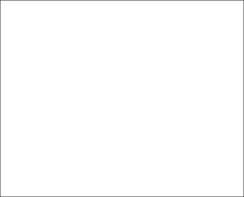

### 1.5 Limitation de la taille de la pile
Nous venons de voir que notre appel à ```mystere(5)``` générait une pile de hauteur 6 (on parlera plutôt de *profondeur* 6). Cette profondeur est-elle limitée ?

In [ ]:
mystere(2962)

Vous venons de provoquer un «débordement de pile», le célèbre **stack overflow**. 

De manière générale, les programmes récursifs sont souvent susceptibles de générer un trop grand nombre d'appels à eux-mêmes. Il est parfois possible de les optimiser, comme nous le verrons dans le cours concernant la **programmation dynamique**.  

Nous reparlerons aussi de récursivité lorsque nous l'inscrirons dans un paradigme plus global de programmation, qui est **« diviser pour régner »** (en anglais *divide and conquer*).

## 2. Exemples de récursivité double

### 2.1 La suite de Fibonnaci
Considérons la suite numérique ainsi définie :
- $F_0 = 0$
- $F_1 = 1$
- $ \forall n \in \mathbb{N}, F_{n+2} = F_{n+1}+F_n$

On a donc $F_2=0+1=1, F_3=F_2+F_1=1+1=2, F_4=F_3+F_2=2+1=3, F_5=F_4+F_3=3+2=5$ ...

#### 2.1.1 Exercice
Implémenter de façon récursive la suite de Fibonnaci.

In [4]:
def fibo(n):
    
    if n == 0 or n == 1 :
        return 1
    else :
        return fibo(n-1) + fibo(n-2)

print(fibo(4))

8


Lien vers une [correction](https://gist.github.com/glassus/6c7c14813fabab8c238c721386147260)

#### 2.1.2 Observation de la pile d'exécution
Appelons ```F(n)``` la fonction calculant de manière récursive le n-ième terme de la suite. Observons en détail la pile d'exécution lors du calcul de ```F(4)```.
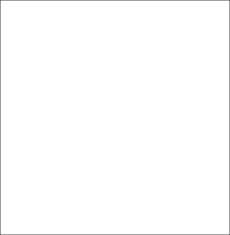

On peut aussi observer l'exécution sur [PythonTutor](http://pythontutor.com/visualize.html#code=def%20fibo%28n%29%3A%0A%20%20%20%20%0A%20%20%20%20if%20n%20%3D%3D%200%20or%20n%20%3D%3D%201%20%3A%0A%20%20%20%20%20%20%20%20return%201%0A%20%20%20%20else%20%3A%0A%20%20%20%20%20%20%20%20return%20fibo%28n-1%29%20%2B%20fibo%28n-2%29%0A%0Aprint%28fibo%284%29%29%0A&cumulative=false&curInstr=38&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

On s'aperçoit notamment que :
- les appels récursifs ne sont PAS simultanés (rappelons que la simultanéité n'existe théoriquement pas en informatique). On pourrait s'imaginer que la relation $F_4=F_3+F_2$ allait déclencher deux «fils» récursifs calculant respectivement $F_3$ et $F_2$. Il n'en est rien, on va jusqu'au bout du calcul de $F_3$ avant de s'intéresser à $F_2$.
- conséquence de la remarque précédente : le calcul de $F_2$ s'effectue 2 fois. Une amélioration future (appelée **mémoïsation**, voir le cours de programmation dynamique) sera de conserver cette valeur de $F_2$ afin d'améliorer les calculs.

#### 2.1.3 Comparaison des performances

**Exercice :** écrire une fonction ```fibo_imperatif(n)``` qui calcule de façon directe (*impérative*) le n-ième terme de la suite de Fibonnaci.

Lien vers une [correction](https://gist.github.com/glassus/9ac28d8bcb12ac917bf17ea81afce288)

Observons grâce au module ```timeit``` le temps moyen pris pour calculer $F(20)$ avec les deux fonctions ```fibo_imperatif()``` et ```fibo_recursif()```.

In [ ]:
%timeit fibo_imperatif(20)

In [ ]:
%timeit fibo_recursif(20)

La programmation récursive apparait donc comme beaucoup plus lente que l'impérative.

### 2.1 Dessins récursifs grâce au module Turtle

In [ ]:
from turtle import *

ang = 40

def trace(n,l):
    
    if n == 0 :
        return None
    else :
        forward(l)
        left(ang)
        trace(n-1,0.7*l)
        right(2*ang)
        trace(n-1,0.7*l)
        left(ang)
        forward(-l)

        
penup()        
goto(0,-80)
pendown()
left(90)
speed(0)

trace(5,100)

![](data/arbre.gif)

<i><u>Source</u></i> : G.Lassus, Lycée François Mauriac --  Bordeaux  